# Submission Pertama: Menyelesaikan Permasalahan Human Resources

- Nama: Mohamad Arif Sofyan
- Email: arifsofyan004@gmail.com
- Id Dicoding: mohamad_arif_sofyan

# Business Understanding

Perusahaan Jaya Jaya Maju merupakan perusahaan multinasional yang beroperasi sejak 2000, memiliki lebih dari 1000 karyawan di seluruh negeri. Meskipun besar, perusahaan mengalami attrition rate yang tinggi (rasio jumlah karyawan yang keluar dengan total karyawan keseluruhan) hingga lebih dari 10%. Hal ini menunjukkan adanya masalah dalam retensi karyawan dan manajemen sumber daya manusia. Untuk menjaga pertumbuhan dan produktivitas, penting untuk memahami faktor-faktor yang memengaruhi kepuasan dan retensi karyawan.

## Persiapan

Deskripsi kolom dalam dataset:

- **EmployeeId**: Identifikasi unik untuk setiap karyawan.
- **Age**: Usia karyawan.
- **Attrition**: Menunjukkan apakah karyawan tersebut mengundurkan diri ('Yes'), tidak ('No'), atau statusnya tidak diketahui ('Unknown').
- **BusinessTravel**: Frekuensi perjalanan bisnis karyawan ('Travel_Frequently', 'Travel_Rarely', 'Non-Travel').
- **DailyRate**: Tarif harian karyawan.
- **Department**: Departemen di mana karyawan bekerja ('Sales', 'Research & Development', 'Human Resources').
- **DistanceFromHome**: Jarak dari rumah karyawan ke tempat kerja (dalam mil).
- **Education**: Tingkat pendidikan karyawan (1: 'Below College', 2: 'College', 3: 'Bachelor', 4: 'Master', 5: 'Doctor').
- **EducationField**: Bidang pendidikan karyawan ('Life Sciences', 'Medical', 'Marketing', dll.).
- **EmployeeCount**: Jumlah karyawan (konstan, selalu bernilai 1).
- **EnvironmentSatisfaction**: Tingkat kepuasan karyawan terhadap lingkungan kerja (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High').
- **Gender**: Jenis kelamin karyawan ('Male' atau 'Female').
- **HourlyRate**: Tarif per jam karyawan.
- **JobInvolvement**: Tingkat keterlibatan karyawan dalam pekerjaan (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High').
- **JobLevel**: Tingkat pekerjaan karyawan dalam perusahaan (1, 2, 3, dll.).
- **JobRole**: Peran atau jabatan karyawan dalam perusahaan ('Sales Executive', 'Research Scientist', dll.).
- **JobSatisfaction**: Tingkat kepuasan karyawan terhadap pekerjaan mereka (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High').
- **MaritalStatus**: Status perkawinan karyawan ('Single', 'Married', 'Divorced').
- **MonthlyIncome**: Pendapatan bulanan karyawan.
- **MonthlyRate**: Tarif bulanan karyawan.
- **NumCompaniesWorked**: Jumlah perusahaan tempat karyawan telah bekerja sebelumnya.
- **Over18**: Menunjukkan apakah karyawan tersebut berusia di atas 18 tahun (selalu bernilai 'Y').
- **OverTime**: Menunjukkan apakah karyawan tersebut bekerja lembur atau tidak ('Yes' atau 'No').
- **PercentSalaryHike**: Persentase kenaikan gaji terakhir karyawan.
- **PerformanceRating**: Rating kinerja karyawan (1: 'Low', 2: 'Good', 3: 'Excellent', 4: 'Outstanding').
- **RelationshipSatisfaction**: Tingkat kepuasan karyawan terhadap hubungan mereka di tempat kerja (1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High').
- **StandardHours**: Jam kerja standar (konstan, selalu bernilai 80).
- **StockOptionLevel**: Tingkat opsi saham yang dimiliki karyawan.
- **TotalWorkingYears**: Total tahun bekerja karyawan.
- **TrainingTimesLastYear**: Jumlah pelatihan yang diikuti karyawan tahun lalu.
- **WorkLifeBalance**: Tingkat keseimbangan antara kehidupan kerja dan kehidupan pribadi karyawan (1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best').
- **YearsAtCompany**: Jumlah tahun karyawan telah bekerja di perusahaan saat ini.
- **YearsInCurrentRole**: Jumlah tahun karyawan telah bekerja dalam peran saat ini.
- **YearsSinceLastPromotion**: Jumlah tahun sejak promosi terakhir karyawan.
- **YearsWithCurrManager**: Jumlah tahun dengan manajer saat ini.

### Menyiapkan library yang dibutuhkan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
import plotly.express as px
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score
import joblib

Mengatur tampilan Pandas

In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

### Menyiapkan data yang akan diguankan

In [7]:
url = "https://raw.githubusercontent.com/arifsofyan004/Menyelesaikan-Permasalahan-Human-Resources/main/employee_data.csv"

df = pd.read_csv(url, index_col='EmployeeId')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Y,Yes,11,3,2,80,1,7,2,3,6,2,1,2
2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,Y,No,15,3,1,80,0,15,2,1,1,0,0,0
3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Y,Yes,12,3,3,80,3,18,2,4,10,0,2,7
4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,Y,No,14,3,4,80,1,23,2,4,20,4,4,8
5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,Y,No,14,3,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 1470
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1058 non-null   float64
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EnvironmentSatisfaction   1470 non-null   int64  
 10  Gender                    1470 non-null   object 
 11  HourlyRate                1470 non-null   int64  
 12  JobInvolvement            1470 non-null   int64  
 13  JobLevel                  1470 non-null   int64  
 14  JobRole      

In [ ]:
df.isna().sum()

Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [ ]:
df.duplicated().sum()

0

Mengisi missing value menjadi 2 yang artinya Uknown, untuk memudahkan proses EDA

In [ ]:
df['Attrition'].fillna(2, inplace=True)
df['Attrition'] = df['Attrition'].astype(int)
df['Attrition'].value_counts()

Attrition
0    879
2    412
1    179
Name: count, dtype: int64

In [ ]:
df.nunique()

Age                           43
Attrition                      3
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

 Menghapus kolom yang memiliki nilai yang sama untuk setiap baris dalam dataset karena tidak memberikan variasi atau kegunaan yang bermanfaat dalam analisis.

In [ ]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis=1, inplace=True)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,38,2,Travel_Frequently,1444,Human Resources,1,4,Other,4,Male,88,3,1,Human Resources,2,Married,2991,5224,0,Yes,11,3,2,1,7,2,3,6,2,1,2
2,37,1,Travel_Rarely,1141,Research & Development,11,2,Medical,1,Female,61,1,2,Healthcare Representative,2,Married,4777,14382,5,No,15,3,1,0,15,2,1,1,0,0,0
3,51,1,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,Male,34,3,1,Research Scientist,3,Married,2461,10332,9,Yes,12,3,3,3,18,2,4,10,0,2,7
4,42,0,Travel_Frequently,555,Sales,26,3,Marketing,3,Female,77,3,4,Sales Executive,2,Married,13525,14864,5,No,14,3,4,1,23,2,4,20,4,4,8
5,40,2,Travel_Rarely,1194,Research & Development,2,4,Medical,3,Female,98,3,1,Research Scientist,3,Married,2001,12549,2,No,14,3,2,3,20,2,3,5,3,0,2


In [ ]:
df.describe(include="all")

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,2,NaN,NaN,NaN,9,NaN,3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,Male,NaN,NaN,NaN,Sales Executive,NaN,Married,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,882,NaN,NaN,NaN,326,NaN,673,NaN,NaN,NaN,1054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,0.682313,NaN,802.485714,NaN,9.192517,2.912925,NaN,2.721769,NaN,65.891156,2.729932,2.063946,NaN,2.728571,NaN,6502.931293,14313.103401,2.693197,NaN,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.881950,NaN,403.509100,NaN,8.106864,1.024165,NaN,1.093082,NaN,20.329428,0.711561,1.106940,NaN,1.102846,NaN,4707.956783,7117.786044,2.498009,NaN,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.000000,NaN,30.000000,1.000000,1.000000,NaN,1.000000,NaN,1009.000000,2094.000000,0.000000,NaN,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,2.000000,NaN,48.000000,2.000000,1.000000,NaN,2.000000,NaN,2911.000000,8047.000000,1.000000,NaN,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,3.000000,NaN,66.000000,3.000000,2.000000,NaN,3.000000,NaN,4919.000000,14235.500000,2.000000,NaN,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,2.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,4.000000,NaN,83.750000,3.000000,3.000000,NaN,4.000000,NaN,8379.000000,20461.500000,4.000000,NaN,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


### Perbandingan Rata-rata Fitur antara Karyawan yang Mengundurkan Diri dan yang Tidak

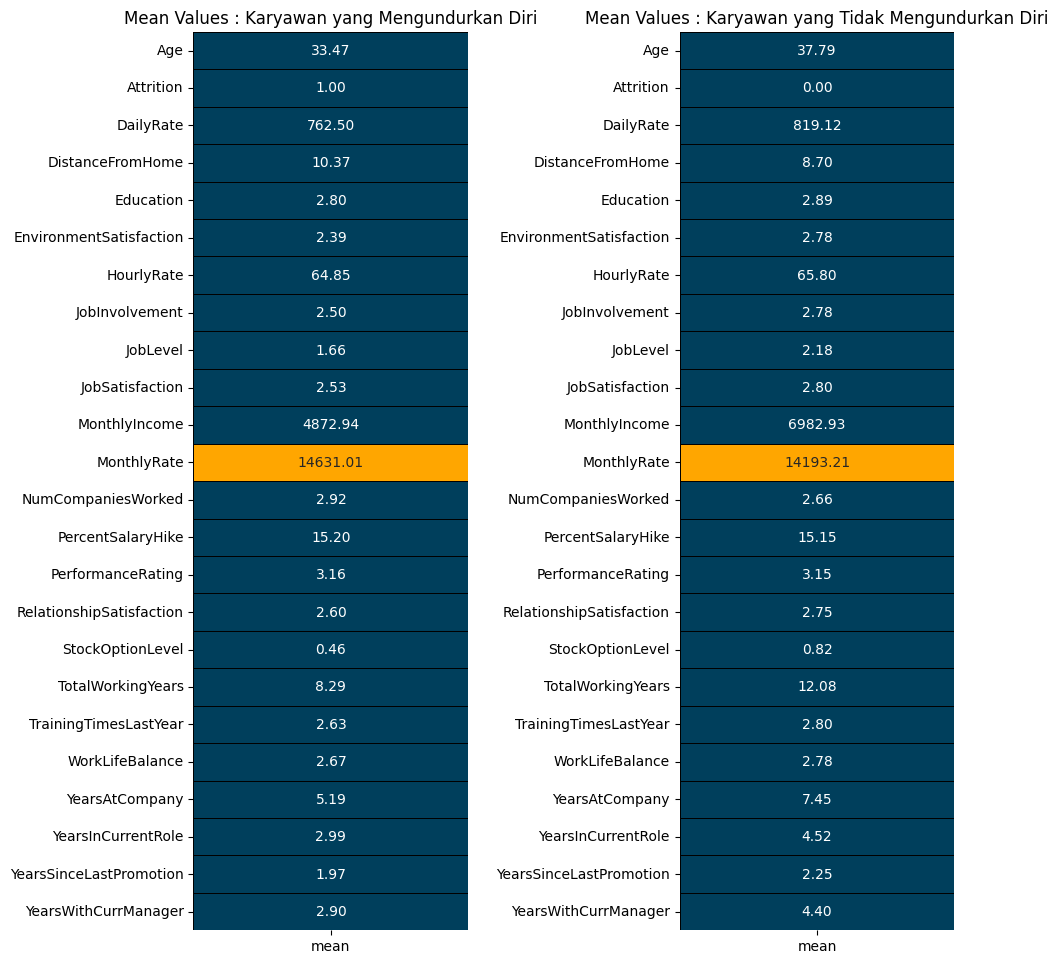

In [ ]:
yes = df[df['Attrition'] == 1 ].describe().T
no = df[df['Attrition'] == 0 ].describe().T

colors = ['#003f5c', '#ffa600']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
plt.subplot(1, 2, 1)
sns.heatmap(yes[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Mean Values : Karyawan yang Mengundurkan Diri')

plt.subplot(1, 2, 2)
sns.heatmap(no[['mean']], annot=True, cmap=colors, linewidths=0.4, linecolor='black', cbar=False, fmt='.2f')
plt.title('Mean Values : Karyawan yang Tidak Mengundurkan Diri')

fig.tight_layout(pad=2)

plt.show()

Dari semua fitur nilai rata-rata untuk karyawan yang mengundurkan diri kebanyakan lebih rendah dari karyawan yang bertahan kecuali kolom DistanceFromHome, MonthlyIncome , NumCompaniesWorked, PercentSalaryHike, dan Performance ranting

### Korelasi antar fitur

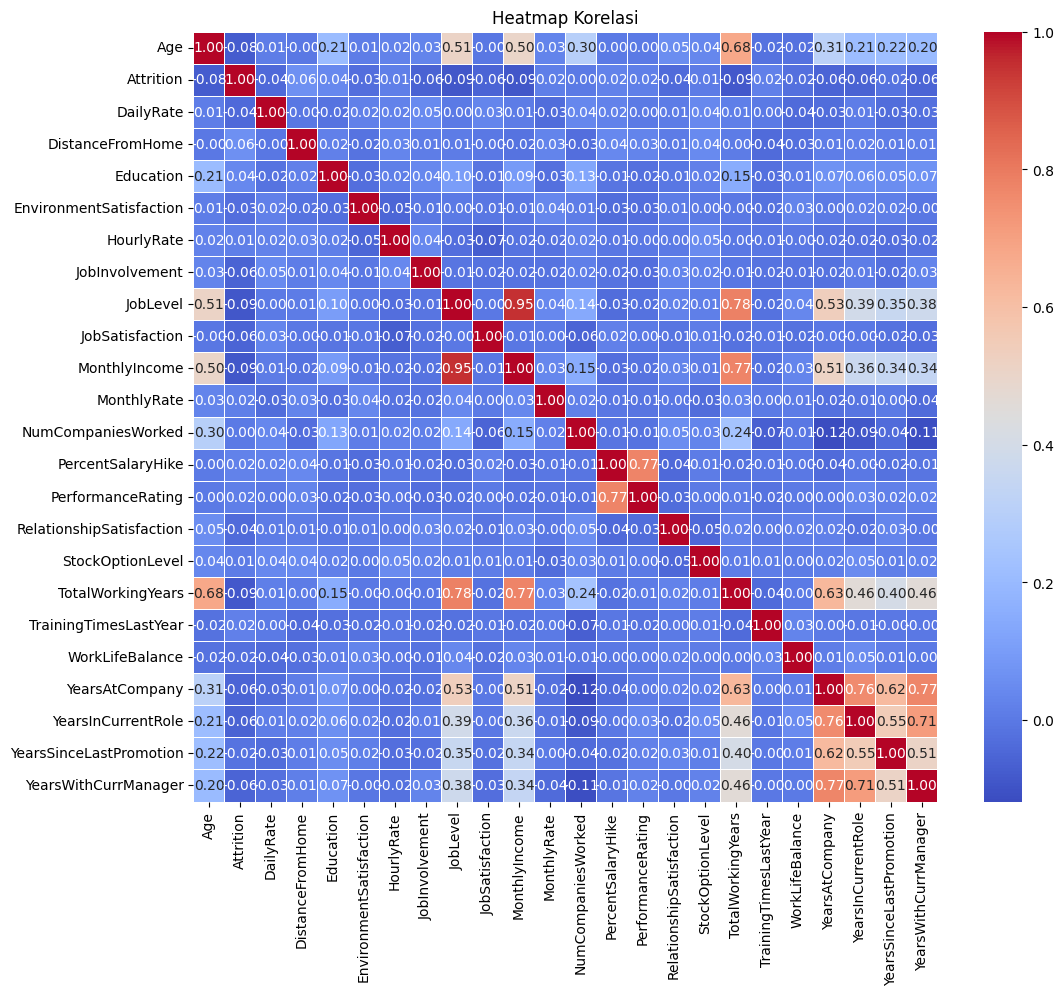

In [ ]:
correlation_matrix = df.corr(numeric_only = True)

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

Pasangan fitur dengan korelasi diatas 0.7

In [ ]:
numeric_columns = df.select_dtypes(include=np.number).columns
correlation_matrix = df[numeric_columns].corr().abs()

high_corr_pairs = (correlation_matrix > 0.7) & (correlation_matrix < 1)
high_corr_indices = np.where(high_corr_pairs)
high_corr_columns = [(numeric_columns[i], numeric_columns[j]) for i, j in zip(*high_corr_indices) if i < j]

high_corr_columns

[('JobLevel', 'MonthlyIncome'),
 ('JobLevel', 'TotalWorkingYears'),
 ('MonthlyIncome', 'TotalWorkingYears'),
 ('PercentSalaryHike', 'PerformanceRating'),
 ('YearsAtCompany', 'YearsInCurrentRole'),
 ('YearsAtCompany', 'YearsWithCurrManager'),
 ('YearsInCurrentRole', 'YearsWithCurrManager')]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 1470
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   int64 
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction           147

### Korelasi antara Fitur Numerik dengan Attrition

In [ ]:
attrition_corr = correlation_matrix['Attrition'].sort_values(ascending=False)
attrition_corr

Attrition                   1.000000
MonthlyIncome               0.090509
JobLevel                    0.089348
TotalWorkingYears           0.085851
Age                         0.075837
DistanceFromHome            0.063210
YearsInCurrentRole          0.061554
JobInvolvement              0.060877
JobSatisfaction             0.056520
YearsWithCurrManager        0.056351
YearsAtCompany              0.056213
DailyRate                   0.042253
Education                   0.039443
RelationshipSatisfaction    0.036680
EnvironmentSatisfaction     0.028198
WorkLifeBalance             0.023499
PercentSalaryHike           0.023377
TrainingTimesLastYear       0.019925
YearsSinceLastPromotion     0.017083
MonthlyRate                 0.016685
PerformanceRating           0.016679
HourlyRate                  0.012839
StockOptionLevel            0.005200
NumCompaniesWorked          0.003313
Name: Attrition, dtype: float64

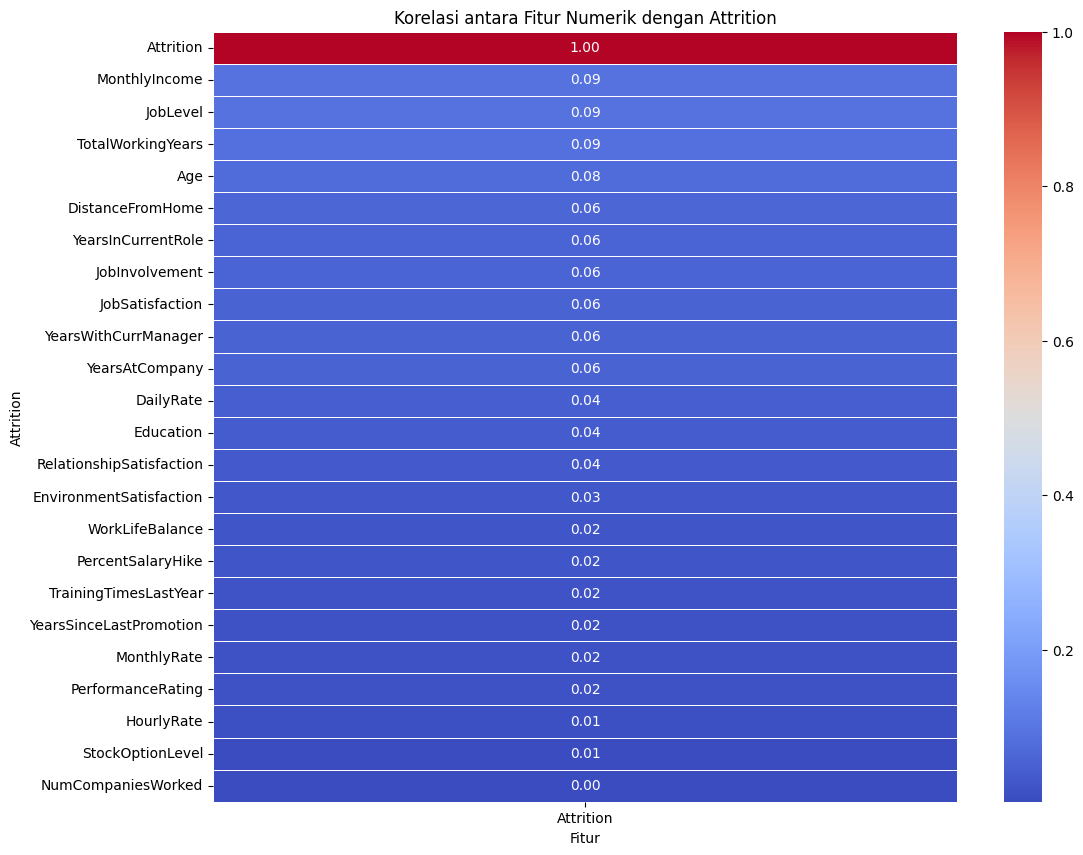

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(attrition_corr.to_frame(), cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title('Korelasi antara Fitur Numerik dengan Attrition')
plt.xlabel('Fitur')
plt.ylabel('Attrition')
plt.show()

Hasil tersebut adalah korelasi antara fitur-fitur dalam dataset dengan fitur target "Attrition", fitur-fitur seperti "MonthlyIncome", "JobLevel", "TotalWorkingYears", dan "Age" memiliki korelasi positif yang cukup signifikan dengan "Attrition", menunjukkan bahwa semakin tinggi nilai-nilai ini, semakin tinggi kemungkinan terjadinya attrition. Fitur-fitur lainnya memiliki korelasi yang lebih rendah, tetapi masih berpotensi mempengaruhi attrition dalam tingkat yang lebih kecil.

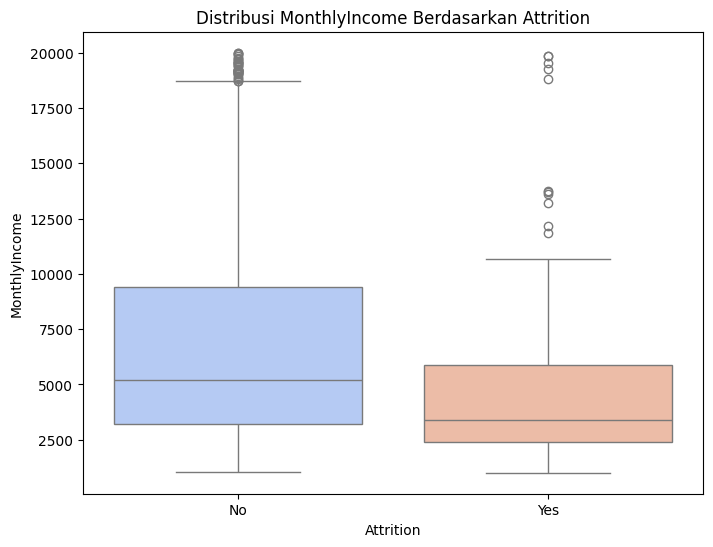

Distribusi MonthlyIncome Berdasarkan Attrition:
           count         mean          std     min     25%     50%     75%      max
Attrition                                                                          
0          879.0  6982.928328  4947.913587  1051.0  3202.5  5210.0  9407.5  19999.0
1          179.0  4872.938547  3807.243146  1009.0  2391.5  3388.0  5872.0  19859.0


In [ ]:
df_attrition_subset = df[df['Attrition'].isin([0, 1])]

plt.figure(figsize=(8, 6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df_attrition_subset, hue='Attrition', palette='coolwarm', legend=False)
plt.title('Distribusi MonthlyIncome Berdasarkan Attrition')
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])

plt.show()
print("Distribusi MonthlyIncome Berdasarkan Attrition:")
print(df_attrition_subset.groupby('Attrition')['MonthlyIncome'].describe())


Penghasilan bulanan rata-rata lebih tinggi pada karyawan yang tidak mengalami attrition **rata-rata sekitar 6982** dibandingkan dengan yang mengalami attrition **rata-rata sekitar 4872**. Namun, variasi penghasilan bulanan lebih besar pada karyawan yang tidak mengalami attrition. Rekomendasi tindakan yang mungkin termasuk meninjau kembali **kebijakan kompensasi** dan **meningkatkan program pengembangan karyawan**

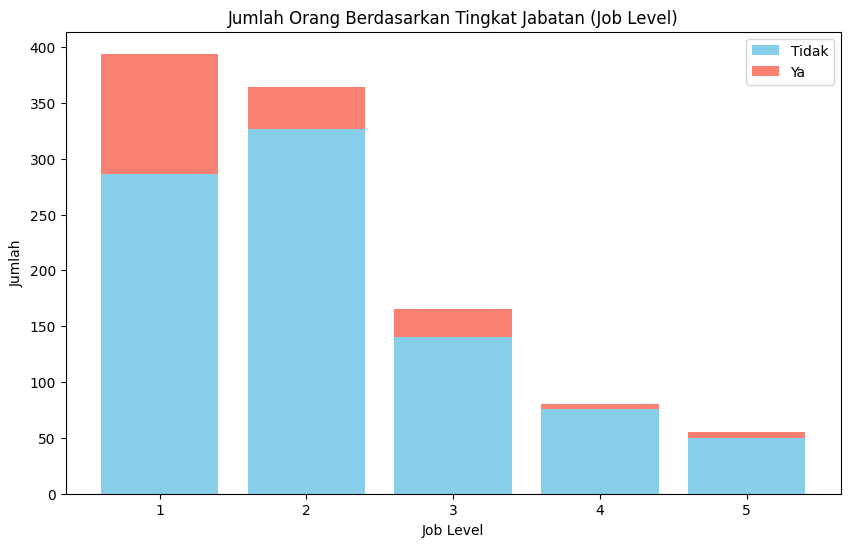

Distribusi jumlah orang berdasarkan tingkat jabatan (Job Level):
Attrition    0    1
JobLevel           
1          286  108
2          327   37
3          140   25
4           76    4
5           50    5


In [ ]:
joblevel_att = df[df['Attrition'].isin([0, 1])].groupby(['JobLevel', 'Attrition']).size().unstack()

plt.figure(figsize=(10, 6))
plt.bar(joblevel_att.index, joblevel_att[0], color='skyblue', label='Tidak')
plt.bar(joblevel_att.index, joblevel_att[1], bottom=joblevel_att[0], color='salmon', label='Ya')

plt.xlabel('Job Level')
plt.ylabel('Jumlah')
plt.title('Jumlah Orang Berdasarkan Tingkat Jabatan (Job Level)')

plt.legend()
plt.show()

print("Distribusi jumlah orang berdasarkan tingkat jabatan (Job Level):")
print(joblevel_att)

Tingkat attrition tertinggi terjadi di tingkat jabatan 1, sementara semakin tinggi tingkat jabatan, semakin rendah tingkat attrition. Rekomendasi yang dapat dilakukan adalah evaluasi kepuasan kerja di tingkat entry-level dan peningkatan peluang pengembangan karir sehingga bisa mengurangi tingkat attrition secara keseluruhan.

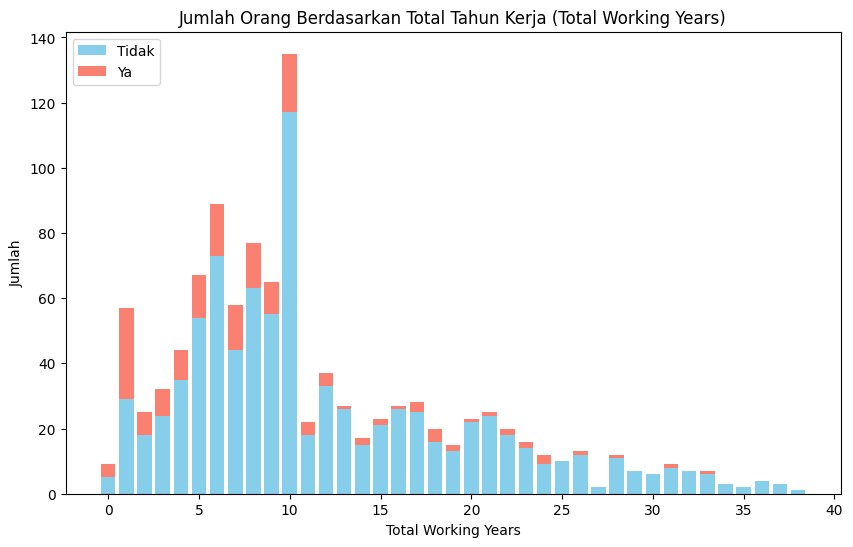

Distribusi jumlah orang berdasarkan total tahun kerja (Total Working Years):
Attrition              0     1
TotalWorkingYears             
0                    5.0   4.0
1                   29.0  28.0
2                   18.0   7.0
3                   24.0   8.0
4                   35.0   9.0
5                   54.0  13.0
6                   73.0  16.0
7                   44.0  14.0
8                   63.0  14.0
9                   55.0  10.0
10                 117.0  18.0
11                  18.0   4.0
12                  33.0   4.0
13                  26.0   1.0
14                  15.0   2.0
15                  21.0   2.0
16                  26.0   1.0
17                  25.0   3.0
18                  16.0   4.0
19                  13.0   2.0
20                  22.0   1.0
21                  24.0   1.0
22                  18.0   2.0
23                  14.0   2.0
24                   9.0   3.0
25                  10.0   NaN
26                  12.0   1.0
27                   2.0

In [ ]:
total_years_att = df[df['Attrition'].isin([0, 1])].groupby(['TotalWorkingYears', 'Attrition']).size().unstack()

plt.figure(figsize=(10, 6))
plt.bar(total_years_att.index, total_years_att[0], color='skyblue', label='Tidak')
plt.bar(total_years_att.index, total_years_att[1], bottom=total_years_att[0], color='salmon', label='Ya')
plt.xlabel('Total Working Years')
plt.ylabel('Jumlah')
plt.title('Jumlah Orang Berdasarkan Total Tahun Kerja (Total Working Years)')

plt.legend()
plt.show()

print("Distribusi jumlah orang berdasarkan total tahun kerja (Total Working Years):")
print(total_years_att)

Tingkat attrition cenderung rendah pada karyawan dengan total tahun kerja yang lebih lama. Namun, terlihat sedikit peningkatan attrition pada karyawan dengan total tahun kerja sekitar 1 hingga 5 tahun. Rekomendasi dapat berfokus pada retensi karyawan baru dan peningkatan program pengembangan karir untuk mempertahankan karyawan di tahun-tahun awal mereka.

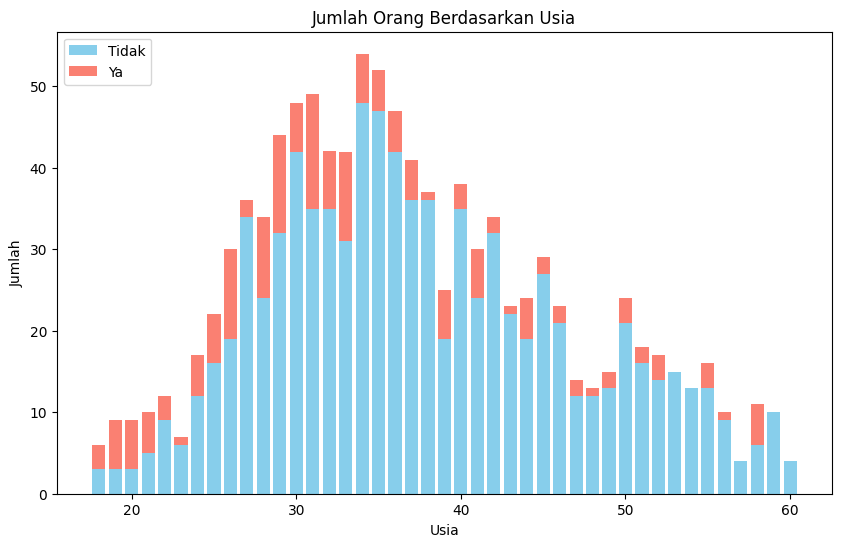

Distribusi jumlah orang berdasarkan usia:
Attrition     0     1
Age                  
18          3.0   3.0
19          3.0   6.0
20          3.0   6.0
21          5.0   5.0
22          9.0   3.0
23          6.0   1.0
24         12.0   5.0
25         16.0   6.0
26         19.0  11.0
27         34.0   2.0
28         24.0  10.0
29         32.0  12.0
30         42.0   6.0
31         35.0  14.0
32         35.0   7.0
33         31.0  11.0
34         48.0   6.0
35         47.0   5.0
36         42.0   5.0
37         36.0   5.0
38         36.0   1.0
39         19.0   6.0
40         35.0   3.0
41         24.0   6.0
42         32.0   2.0
43         22.0   1.0
44         19.0   5.0
45         27.0   2.0
46         21.0   2.0
47         12.0   2.0
48         12.0   1.0
49         13.0   2.0
50         21.0   3.0
51         16.0   2.0
52         14.0   3.0
53         15.0   NaN
54         13.0   NaN
55         13.0   3.0
56          9.0   1.0
57          4.0   NaN
58          6.0   5.0
59         1

In [ ]:
age_att = df.groupby(['Age', 'Attrition']).size().unstack()

plt.figure(figsize=(10, 6))

plt.bar(age_att.index, age_att[0], color='skyblue', label='Tidak')
plt.bar(age_att.index, age_att[1], bottom=age_att[0], color='salmon', label='Ya')

plt.xlabel('Usia')
plt.ylabel('Jumlah')
plt.title('Jumlah Orang Berdasarkan Usia')

plt.legend()

plt.show()

# Print hasil plot
print("Distribusi jumlah orang berdasarkan usia:")
print(age_att)


Tingkat attrition cenderung meningkat pada karyawan yang berusia muda, khususnya di bawah 30 tahun. Setelah usia 30 tahun, terjadi penurunan dalam tingkat attrition, dan setelah usia 40 tahun, tingkat attrition cenderung stabil. Rekomendasi fokus pada upaya retensi karyawan yang lebih muda, seperti meningkatkan kepuasan kerja, memberikan kesempatan pengembangan karir, dan menawarkan program keseimbangan kerja-hidup yang fleksibel.

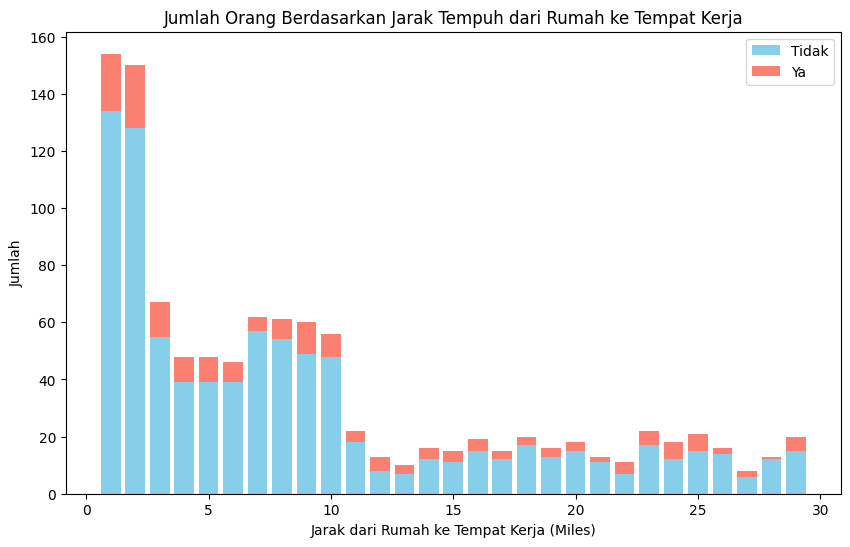

Distribusi jumlah orang berdasarkan jarak tempuh dari rumah ke tempat kerja:
Attrition           0   1
DistanceFromHome         
1                 134  20
2                 128  22
3                  55  12
4                  39   9
5                  39   9
6                  39   7
7                  57   5
8                  54   7
9                  49  11
10                 48   8
11                 18   4
12                  8   5
13                  7   3
14                 12   4
15                 11   4
16                 15   4
17                 12   3
18                 17   3
19                 13   3
20                 15   3
21                 11   2
22                  7   4
23                 17   5
24                 12   6
25                 15   6
26                 14   2
27                  6   2
28                 12   1
29                 15   5


In [ ]:
distance_att = df.groupby(['DistanceFromHome', 'Attrition']).size().unstack()

plt.figure(figsize=(10, 6))

plt.bar(distance_att.index, distance_att[0], color='skyblue', label='Tidak')
plt.bar(distance_att.index, distance_att[1], bottom=distance_att[0], color='salmon', label='Ya')

plt.xlabel('Jarak dari Rumah ke Tempat Kerja (Miles)')
plt.ylabel('Jumlah')
plt.title('Jumlah Orang Berdasarkan Jarak Tempuh dari Rumah ke Tempat Kerja')

plt.legend()

plt.show()

# Print hasil plot
print("Distribusi jumlah orang berdasarkan jarak tempuh dari rumah ke tempat kerja:")
print(distance_att)


Distribusi jumlah orang yang mengalami attrition cenderung lebih tinggi pada jarak tempuh yang pendek (1-3 mil) dan meningkat lagi pada jarak tempuh yang lebih jauh (4-9 mil). Namun, pada jarak tempuh yang sangat jauh (10 mil atau lebih), jumlah orang yang mengalami attrition cenderung menurun. Rekomendasi dapat berfokus pada meningkatkan kualitas lingkungan kerja bagi karyawan yang harus melakukan perjalanan jarak jauh, seperti menawarkan fasilitas transportasi atau program kerja jarak jauh jika memungkinkan. Selain itu, perusahaan juga dapat mempertimbangkan strategi retensi untuk karyawan yang berada pada jarak tempuh yang pendek, mungkin dengan mengevaluasi faktor-faktor yang mempengaruhi kepuasan kerja dan keseimbangan kehidupan kerja.

# CONCLUSION:
Berdasarkan analisis korelasi antara fitur-fitur dan tingkat attrition, dapat disimpulkan bahwa terdapat beberapa fitur yang memiliki korelasi positif yang cukup signifikan dengan kecenderungan attrition di antara karyawan. Fitur-fitur seperti "MonthlyIncome", "JobLevel", "TotalWorkingYears", dan "Age" memiliki hubungan yang kuat dengan kemungkinan terjadinya attrition. Sebaliknya, fitur-fitur lainnya memiliki korelasi yang lebih rendah.

Hal ini menunjukkan bahwa faktor-faktor seperti tingkat pendapatan bulanan, tingkat jabatan, pengalaman kerja, dan usia karyawan dapat menjadi pertimbangan penting dalam memahami dan mengelola potensi attrition di tempat kerja. Oleh karena itu, pemantauan dan manajemen yang cermat terhadap kondisi dan kebutuhan karyawan, terutama dalam hal kompensasi, pengembangan karir, dan keseimbangan pekerjaan-hidup, dapat membantu mengurangi risiko attrition dan mempertahankan keberlangsungan organisasi.

# Korelasi antara Fitur kategorik dengan Kolom Attrition

Korelasi antara 'Attrition' dan 'BusinessTravel':
Nilai Chi-square: 14.332355208763643
p-value: 0.006306485930005145



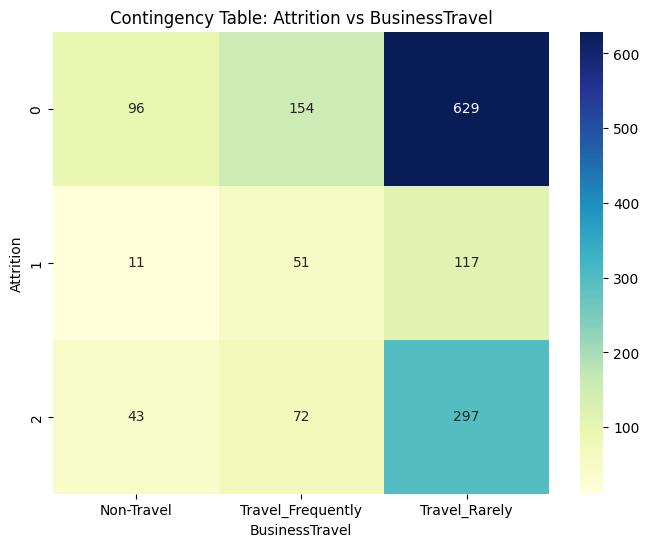

Korelasi antara 'Attrition' dan 'Department':
Nilai Chi-square: 9.357296802895233
p-value: 0.05276352430687315



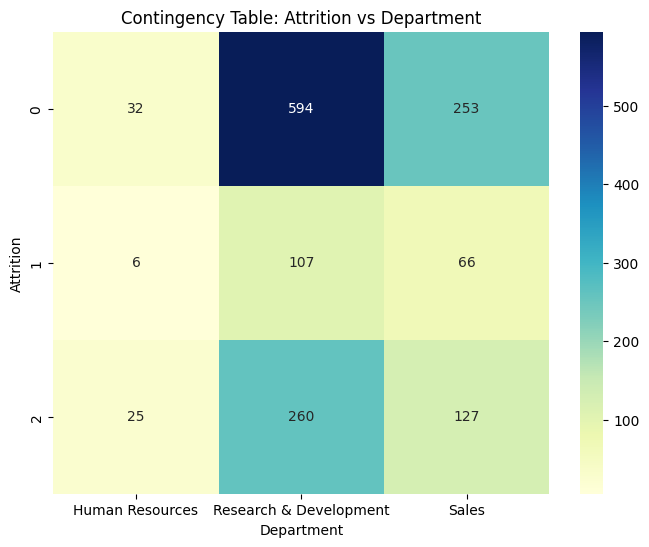

Korelasi antara 'Attrition' dan 'EducationField':
Nilai Chi-square: 15.521316040939393
p-value: 0.1141798251369252



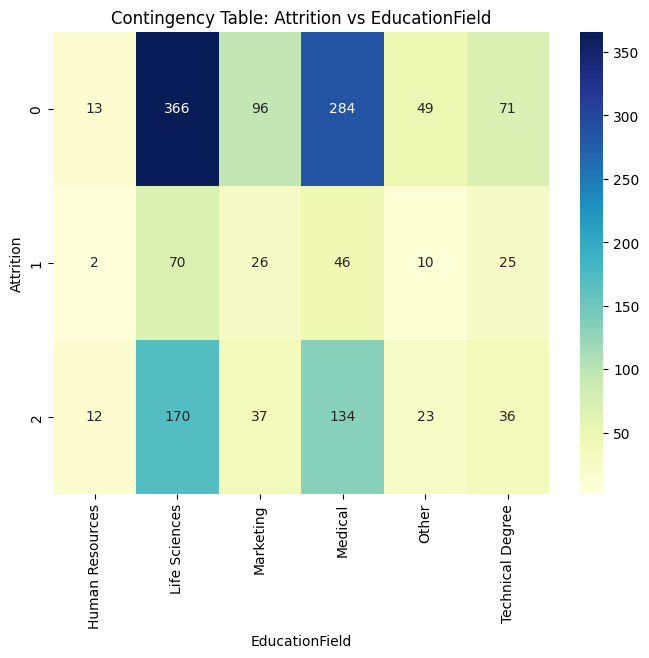

Korelasi antara 'Attrition' dan 'Gender':
Nilai Chi-square: 3.347784404285549
p-value: 0.18751579405808688



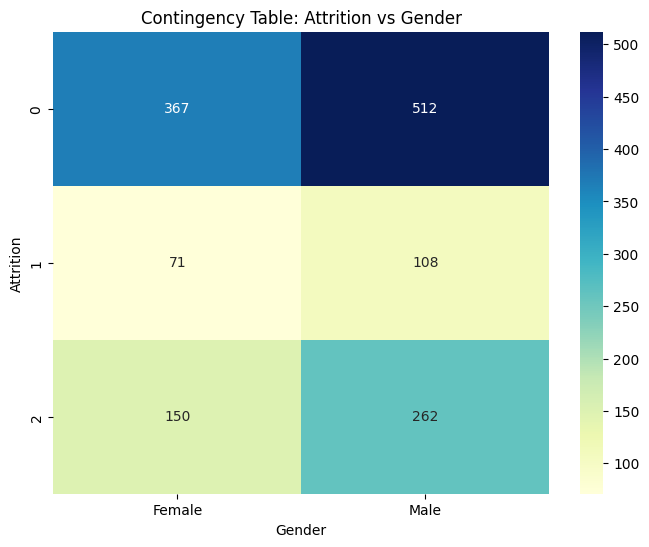

Korelasi antara 'Attrition' dan 'JobRole':
Nilai Chi-square: 76.99783012406454
p-value: 5.756415523121446e-10



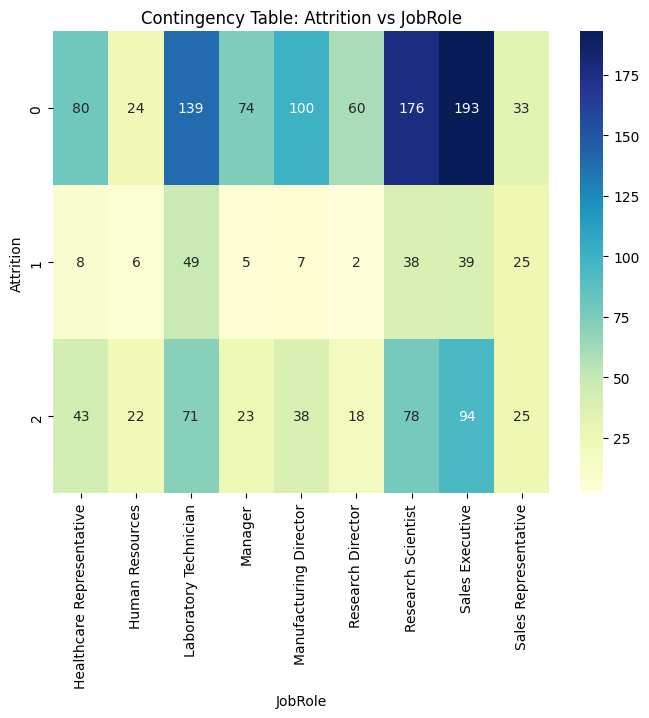

Korelasi antara 'Attrition' dan 'MaritalStatus':
Nilai Chi-square: 44.40307898523724
p-value: 5.290670456714066e-09



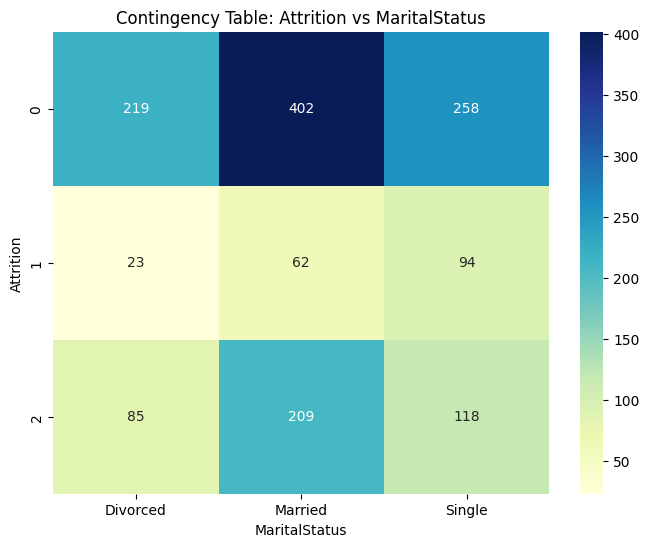

Korelasi antara 'Attrition' dan 'OverTime':
Nilai Chi-square: 71.26287227919202
p-value: 3.353234318592063e-16



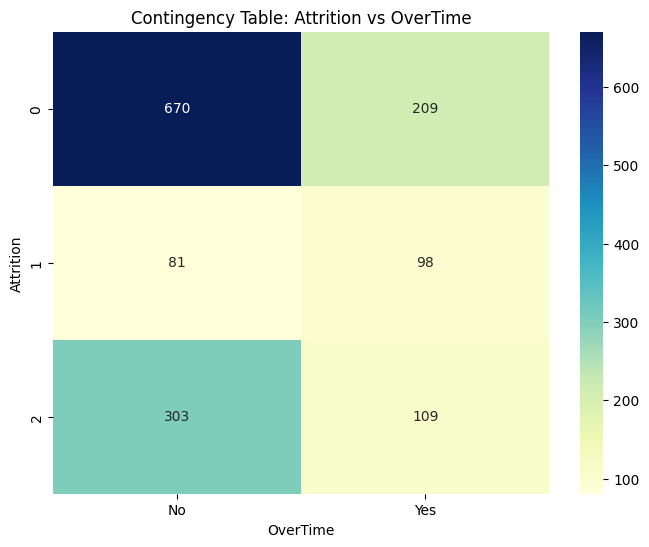

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    if column != 'Attrition':
        contingency_table = pd.crosstab(df['Attrition'], df[column])

        chi2, p_value, dof, expected = chi2_contingency(contingency_table)

        print(f"Korelasi antara 'Attrition' dan '{column}':")
        print("Nilai Chi-square:", chi2)
        print("p-value:", p_value)
        print()

        # Plot tabel kontingensi
        plt.figure(figsize=(8, 6))
        sns.heatmap(contingency_table, annot=True, fmt='d', cmap='YlGnBu')
        plt.title(f"Contingency Table: Attrition vs {column}")
        plt.xlabel(column)
        plt.ylabel("Attrition")
        plt.show()


In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns

correlation_results = []

for column in categorical_columns:
    if column != 'Attrition':
        contingency_table = pd.crosstab(df['Attrition'], df[column])

        chi2, p_value, dof, expected = chi2_contingency(contingency_table)

        correlation_results.append({
            'Column': column,
            'Chi-Square': chi2,
            'p-value': p_value
        })

sorted_results = sorted(correlation_results, key=lambda x: x['Chi-Square'], reverse=True)

for result in sorted_results:
    print(f"Korelasi antara 'Attrition' dan '{result['Column']}':")
    print("Nilai Chi-square:", result['Chi-Square'])
    print("p-value:", result['p-value'])
    print()

Korelasi antara 'Attrition' dan 'JobRole':
Nilai Chi-square: 76.99783012406454
p-value: 5.756415523121446e-10

Korelasi antara 'Attrition' dan 'OverTime':
Nilai Chi-square: 71.26287227919202
p-value: 3.353234318592063e-16

Korelasi antara 'Attrition' dan 'MaritalStatus':
Nilai Chi-square: 44.40307898523724
p-value: 5.290670456714066e-09

Korelasi antara 'Attrition' dan 'EducationField':
Nilai Chi-square: 15.521316040939393
p-value: 0.1141798251369252

Korelasi antara 'Attrition' dan 'BusinessTravel':
Nilai Chi-square: 14.332355208763643
p-value: 0.006306485930005145

Korelasi antara 'Attrition' dan 'Department':
Nilai Chi-square: 9.357296802895233
p-value: 0.05276352430687315

Korelasi antara 'Attrition' dan 'Gender':
Nilai Chi-square: 3.347784404285549
p-value: 0.18751579405808688



Dari hasil tersebut, kita dapat melihat bahwa variabel 'JobRole' dan 'OverTime' memiliki nilai Chi-square yang paling tinggi, yaitu 76.9978 dan 71.2629. Ini menunjukkan bahwa ada hubungan yang signifikan antara atribut ini dengan atribut 'Attrition'.

Variabel 'MaritalStatus' juga memiliki nilai Chi-square yang cukup tinggi, yaitu 44.4031, menunjukkan bahwa status perkawinan juga dapat menjadi faktor yang berpengaruh terhadap keputusan attrition.

Di sisi lain, variabel 'EducationField', 'BusinessTravel', dan 'Department' memiliki nilai Chi-square yang lebih rendah, masing-masing 15.5213, 14.3324, dan 9.3573. Ini menunjukkan bahwa hubungan antara variabel ini dengan 'Attrition' mungkin tidak sekuat variabel lainnya.

Variabel 'Gender' memiliki nilai Chi-square yang paling rendah, yaitu 3.3478, dan p-value yang tinggi, menunjukkan bahwa tidak ada hubungan yang signifikan antara jenis kelamin dan kecenderungan attrition.

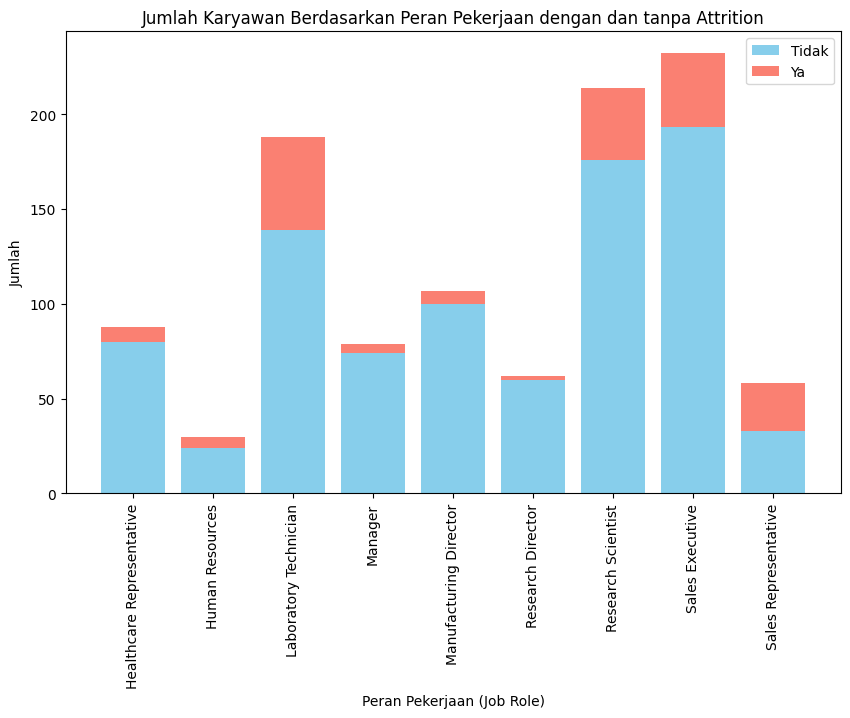

Distribusi jumlah orang berdasarkan peran pekerjaan (Job Role) dengan dan tanpa Attrition:
Attrition                    0   1
JobRole                           
Healthcare Representative   80   8
Human Resources             24   6
Laboratory Technician      139  49
Manager                     74   5
Manufacturing Director     100   7
Research Director           60   2
Research Scientist         176  38
Sales Executive            193  39
Sales Representative        33  25


In [ ]:
job_role_att = df[df['Attrition'].isin([0, 1])].groupby(['JobRole', 'Attrition']).size().unstack()

plt.figure(figsize=(10, 6))

plt.bar(job_role_att.index, job_role_att[0], color='skyblue', label='Tidak')
plt.bar(job_role_att.index, job_role_att[1], bottom=job_role_att[0], color='salmon', label='Ya')

plt.xlabel('Peran Pekerjaan (Job Role)')
plt.ylabel('Jumlah')
plt.title('Jumlah Karyawan Berdasarkan Peran Pekerjaan dengan dan tanpa Attrition')

plt.xticks(rotation=90)
plt.legend()

plt.show()

# Print hasil plot
print("Distribusi jumlah orang berdasarkan peran pekerjaan (Job Role) dengan dan tanpa Attrition:")
print(job_role_att)

Distribusi jumlah orang berdasarkan peran pekerjaan (Job Role) menunjukkan bahwa posisi **Laboratory Technician, Research Scientist, Sales Executive,** dan **Sales Representative** memiliki tingkat attrition yang tinggi. Rekomendasi yang dapat dilakukan adalah evaluasi kondisi kerja, pengembangan karir, perbaikan lingkungan kerja, dan pengelolaan kinerja yang lebih baik untuk meningkatkan kepuasan kerja dan retensi karyawan.

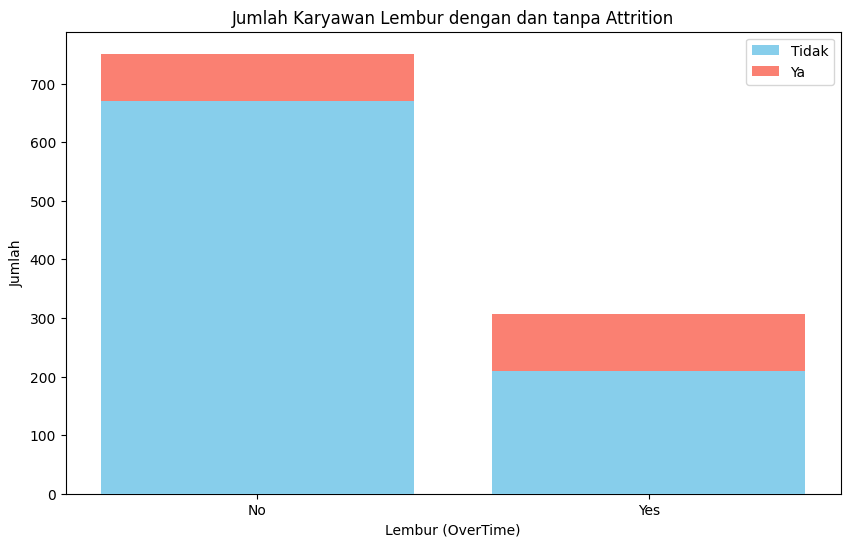

Distribusi jumlah orang berdasarkan lembur (OverTime):
Attrition    0   1
OverTime          
No         670  81
Yes        209  98


In [ ]:
overtime_att = df[df['Attrition'].isin([0, 1])].groupby(['OverTime', 'Attrition']).size().unstack()

plt.figure(figsize=(10, 6))

plt.bar(overtime_att.index, overtime_att[0], color='skyblue', label='Tidak', zorder=3)
plt.bar(overtime_att.index, overtime_att[1], bottom=overtime_att[0], color='salmon', label='Ya', zorder=3)

plt.xlabel('Lembur (OverTime)')
plt.ylabel('Jumlah')
plt.title('Jumlah Karyawan Lembur dengan dan tanpa Attrition')

plt.legend()
plt.show()

# Print hasil plot
print("Distribusi jumlah orang berdasarkan lembur (OverTime):")
print(overtime_att)


Berdasarkan distribusi jumlah karyawan lembur (OverTime), dapat disimpulkan bahwa lebih banyak karyawan yang tidak lembur dibandingkan yang lembur. Namun, proporsi karyawan yang mengalami attrition lebih tinggi di antara mereka yang lembur.

rekomendasi yang dapat dilakukan adalah Pertimbangkan strategi untuk mengelola waktu dan tugas agar meminimalkan lembur yang berlebihan dan mengurangi risiko attrition.

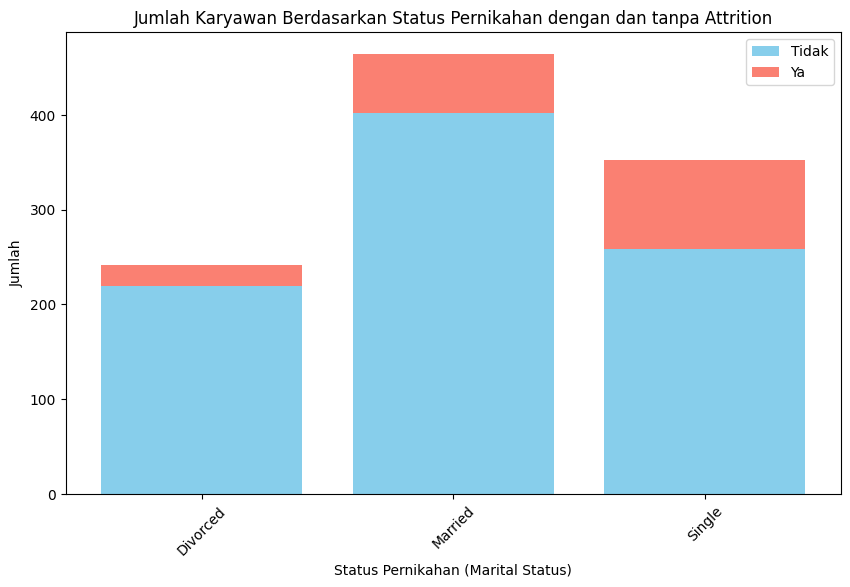

Distribusi jumlah orang berdasarkan status pernikahan (Marital Status) dengan dan tanpa Attrition:
Attrition        0   1
MaritalStatus         
Divorced       219  23
Married        402  62
Single         258  94


In [ ]:
marital_status_att = df[df['Attrition'].isin([0, 1])].groupby(['MaritalStatus', 'Attrition']).size().unstack()

plt.figure(figsize=(10, 6))

plt.bar(marital_status_att.index, marital_status_att[0], color='skyblue', label='Tidak')
plt.bar(marital_status_att.index, marital_status_att[1], bottom=marital_status_att[0], color='salmon', label='Ya')

plt.xlabel('Status Pernikahan (Marital Status)')
plt.ylabel('Jumlah')
plt.title('Jumlah Karyawan Berdasarkan Status Pernikahan dengan dan tanpa Attrition')

plt.xticks(rotation=45)
plt.legend()

plt.show()

# Print hasil plot
print("Distribusi jumlah orang berdasarkan status pernikahan (Marital Status) dengan dan tanpa Attrition:")
print(marital_status_att)

Dari distribusi jumlah orang berdasarkan status pernikahan (Marital Status), terlihat bahwa karyawan yang status pernikahannya **Single** memiliki tingkat attrition yang **lebih tinggi dibandingkan dengan yang lainnya**. Rekomendasi tindakan yang dapat diambil adalah dengan memberikan program dukungan kesejahteraan mental dan sosial, meningkatkan keseimbangan kerja-hidup, dan menyediakan lebih banyak kesempatan pengembangan karir untuk karyawan yang berstatus single.

# CONCLUSION:

Analisis menunjukkan bahwa faktor-faktor seperti posisi pekerjaan, lembur, dan status pernikahan memiliki hubungan yang kuat dengan tingkat karyawan yang keluar dari perusahaan. Temuan ini memberikan wawasan yang berharga bagi perusahaan untuk mengenali pola-pola yang dapat membantu mengurangi jumlah karyawan yang keluar. Dengan pemahaman ini, perusahaan dapat mengambil langkah-langkah proaktif, seperti meningkatkan kepuasan kerja, mengelola waktu kerja dengan lebih efisien, atau memberikan lebih banyak peluang karir kepada karyawan yang belum menikah.

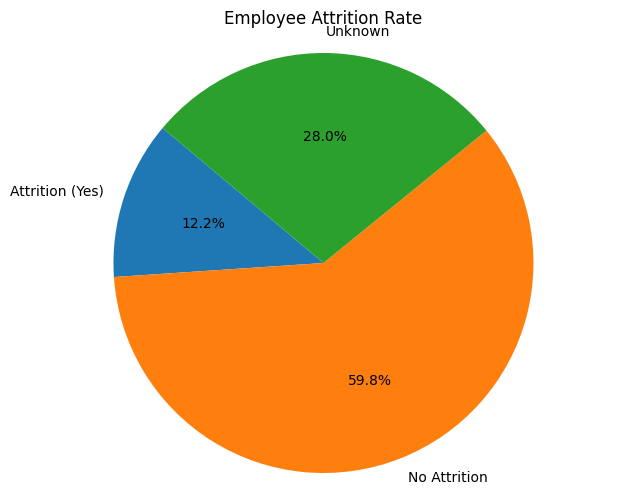

In [ ]:
attrition_counts = df['Attrition'].value_counts()

attrition_yes = attrition_counts.get(1, 0)
attrition_no = attrition_counts.get(0, 0)
attrition_unknown = attrition_counts.get(2, 0)

labels = ['Attrition (Yes)', 'No Attrition', 'Unknown']
employees_count = [attrition_yes, attrition_no, attrition_unknown]

plt.figure(figsize=(8, 6))
plt.pie(employees_count, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Employee Attrition Rate')
plt.axis('equal')
plt.show()

rasio rate attrition sekitar 12.2%

## Data Preparation / Preprocessing

Menghapus salah satu pasangan kolom yang korelasinya tinggi. Tidak ada standar pasti untuk menentukan nilai korelasi yang dianggap tinggi, tetapi biasanya angka 0.7 digunakan sebagai acuan.


In [ ]:
correlation_matrix = df.corr(numeric_only=True).abs()
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

to_drop_hicorr

In [ ]:
df.drop(to_drop_hicorr, axis=1, inplace=True)
print("Ukuran DataFrame setelah penghapusan kolom:", df.shape)

Ukuran DataFrame setelah penghapusan kolom: (1470, 26)


Check categorical feature

In [ ]:
df.select_dtypes(include='object').nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
OverTime          2
dtype: int64

Masih aman tidak ada kolom yang di dominasi oleh salah satu nilai

In [ ]:
df.nunique()

Age                           43
Attrition                      3
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyRate                 1427
NumCompaniesWorked            10
OverTime                       2
PercentSalaryHike             15
RelationshipSatisfaction       4
StockOptionLevel               4
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCompany                37
YearsSinceLastPromotion       16
dtype: int64

Bining kolom Age

In [ ]:
def bin_age(age):
    if age < 30:
        return '-30 tahun'
    elif 30 <= age < 40:
        return '30-39 tahun'
    elif 40 <= age < 50:
        return '40-49 tahun'
    else:
        return '50+ tahun'

df['AgeGroup'] = df['Age'].apply(bin_age)
print(df['AgeGroup'].value_counts())

AgeGroup
30-39 tahun    622
40-49 tahun    349
-30 tahun      326
50+ tahun      173
Name: count, dtype: int64


Menghapus kolom 'Age'

In [ ]:
df.drop(columns=['Age'], inplace=True)

Binning pada kolom 'DailyRate'

In [ ]:
bins = [0, 600, 1000, 1300, np.inf]
labels = ['0-599', '600-999', '1000-1299', '1300+']

df['DailyRateGroup'] = pd.cut(df['DailyRate'], bins=bins, labels=labels, right=False)
print(df['DailyRateGroup'].value_counts())

DailyRateGroup
0-599        527
600-999      420
1000-1299    304
1300+        219
Name: count, dtype: int64


Menghapus kolom 'DailyRate'

In [ ]:
df.drop(columns=['DailyRate'], inplace=True)

Binning kolom 'MonthlyRate'

In [ ]:
bins = [0, 5000, 10000, 15000, 20000, np.inf]
labels = ['0-4.999', '5.000-9.999', '10.000-14.999', '15.000-19.999', '20.000+']
df['MonthlyRateGroup'] = pd.cut(df['MonthlyRate'], bins=bins, labels=labels, right=False)
print(df['MonthlyRateGroup'].value_counts())

MonthlyRateGroup
20.000+          398
5.000-9.999      316
15.000-19.999    299
10.000-14.999    286
0-4.999          171
Name: count, dtype: int64


Menghaous kolom 'MonthlyRate'

In [ ]:
df.drop(columns=['MonthlyRate'], inplace=True)

Binning untuk kolom DistanceFromHome (miles), HourlyRate (per hour), YearsAtCompany (years)

In [ ]:
bins_distance = [0, 5, 10, 15, 20, np.inf]
labels_distance = ['0-4 miles', '5-9 miles', '10-14 miles', '15-19 miles', '20+ miles']
df['DistanceGroup'] = pd.cut(df['DistanceFromHome'], bins=bins_distance, labels=labels_distance)

bins_hourly_rate = [0, 50, 70, np.inf]
labels_hourly_rate = ['0-49', '50-69', '70+']
df['HourlyRateGroup'] = pd.cut(df['HourlyRate'], bins=bins_hourly_rate, labels=labels_hourly_rate)

bins_years_company = [0, 5, 10, 15, np.inf]
labels_years_company = ['0-4 years', '5-9 years', '10-14 years', '15+ years']
df['YearsAtCompanyGroup'] = pd.cut(df['YearsAtCompany'], bins=bins_years_company, labels=labels_years_company, include_lowest=True)

print("Distance Group:")
print(df['DistanceGroup'].value_counts())

print("\nHourly Rate Group:")
print(df['HourlyRateGroup'].value_counts())

print("\nYears at Company Group:")
print(df['YearsAtCompanyGroup'].value_counts())

Distance Group:
DistanceGroup
0-4 miles      632
5-9 miles      394
20+ miles      204
15-19 miles    125
10-14 miles    115
Name: count, dtype: int64

Hourly Rate Group:
HourlyRateGroup
70+      653
0-49     409
50-69    408
Name: count, dtype: int64

Years at Company Group:
YearsAtCompanyGroup
0-4 years      776
5-9 years      448
15+ years      138
10-14 years    108
Name: count, dtype: int64


Menghapus kolom DistanceFromHome, HourlyRate, YearsAtCompany

In [ ]:
df.drop(columns=['DistanceFromHome', 'HourlyRate', 'YearsAtCompany'], inplace=True)
df.head()

,Attrition,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,AgeGroup,DailyRateGroup,MonthlyRateGroup,DistanceGroup,HourlyRateGroup,YearsAtCompanyGroup
EmployeeId,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2,Travel_Frequently,Human Resources,4,Other,4,Male,3,1,Human Resources,2,Married,0,Yes,11,2,1,2,3,1,30-39 tahun,1300+,5.000-9.999,0-4 miles,70+,5-9 years
2,1,Travel_Rarely,Research & Development,2,Medical,1,Female,1,2,Healthcare Representative,2,Married,5,No,15,1,0,2,1,0,30-39 tahun,1000-1299,10.000-14.999,10-14 miles,50-69,0-4 years
3,1,Travel_Rarely,Research & Development,4,Life Sciences,1,Male,3,1,Research Scientist,3,Married,9,Yes,12,3,3,2,4,2,50+ tahun,1300+,10.000-14.999,0-4 miles,0-49,5-9 years
4,0,Travel_Frequently,Sales,3,Marketing,3,Female,3,4,Sales Executive,2,Married,5,No,14,4,1,2,4,4,40-49 tahun,0-599,10.000-14.999,20+ miles,70+,15+ years
5,2,Travel_Rarely,Research & Development,4,Medical,3,Female,3,1,Research Scientist,3,Married,2,No,14,2,3,2,3,0,40-49 tahun,1000-1299,10.000-14.999,0-4 miles,70+,0-4 years


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 1470
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition                 1470 non-null   int64   
 1   BusinessTravel            1470 non-null   object  
 2   Department                1470 non-null   object  
 3   Education                 1470 non-null   int64   
 4   EducationField            1470 non-null   object  
 5   EnvironmentSatisfaction   1470 non-null   int64   
 6   Gender                    1470 non-null   object  
 7   JobInvolvement            1470 non-null   int64   
 8   JobLevel                  1470 non-null   int64   
 9   JobRole                   1470 non-null   object  
 10  JobSatisfaction           1470 non-null   int64   
 11  MaritalStatus             1470 non-null   object  
 12  NumCompaniesWorked        1470 non-null   int64   
 13  OverTime                  1470 non-null   object  
 1

Mengubah tipe data category menjadi object

In [ ]:
df['DailyRateGroup'] = df['DailyRateGroup'].astype('object')
df['MonthlyRateGroup'] = df['MonthlyRateGroup'].astype('object')
df['DistanceGroup'] = df['DistanceGroup'].astype('object')
df['HourlyRateGroup'] = df['HourlyRateGroup'].astype('object')
df['YearsAtCompanyGroup'] = df['YearsAtCompanyGroup'].astype('object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 1470
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Attrition                 1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   Department                1470 non-null   object
 3   Education                 1470 non-null   int64 
 4   EducationField            1470 non-null   object
 5   EnvironmentSatisfaction   1470 non-null   int64 
 6   Gender                    1470 non-null   object
 7   JobInvolvement            1470 non-null   int64 
 8   JobLevel                  1470 non-null   int64 
 9   JobRole                   1470 non-null   object
 10  JobSatisfaction           1470 non-null   int64 
 11  MaritalStatus             1470 non-null   object
 12  NumCompaniesWorked        1470 non-null   int64 
 13  OverTime                  1470 non-null   object
 14  PercentSalaryHike         147

Mengganti missing value yang tadinya di isi nilai 2 udah memudahkan proses EDA sekarang akan di isi dari nilai median

In [ ]:
median_attrition = df['Attrition'].median()
df['Attrition'].replace(2, median_attrition, inplace=True)

df['Attrition'] = df['Attrition'].astype(int)

print(df['Attrition'].value_counts())

Attrition
0    1291
1     179
Name: count, dtype: int64


## Modeling

### Dataset Splitting

In [ ]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 25), (294, 25), (1176,), (294,))

In [ ]:
numerical_cols = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobLevel',
                  'JobSatisfaction', 'NumCompaniesWorked', 'PercentSalaryHike',
                  'RelationshipSatisfaction', 'StockOptionLevel', 'TrainingTimesLastYear',
                  'WorkLifeBalance', 'YearsSinceLastPromotion']

categorical_cols = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
                    'JobRole', 'MaritalStatus', 'OverTime', 'AgeGroup',
                    'DailyRateGroup', 'MonthlyRateGroup', 'DistanceGroup',
                    'HourlyRateGroup', 'YearsAtCompanyGroup']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

Memakai SMOTE untuk menangani data yang IMBALANCE

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_processed, y_train)

# Model Logistic Regression

In [ ]:
logistic_model = Pipeline(steps=[
    ('classifier', LogisticRegression(solver='liblinear', max_iter=1000))
])

param_space_lr = {
    "classifier__C": np.logspace(-3, 3, 7),
    "classifier__fit_intercept": [True, False],
    "classifier__penalty": ['l1', 'l2'],
    "classifier__tol": [0.001, 0.01, 0.1]
}

model_lr = GridSearchCV(logistic_model, param_grid=param_space_lr, cv=3)

model_lr.fit(X_train_resampled, y_train_resampled)

print("Best Parameters (Logistic Regression):", model_lr.best_params_)
print("Training Accuracy (Logistic Regression):", model_lr.score(X_train_resampled, y_train_resampled))
print("Model Best Score (Logistic Regression):", model_lr.best_score_)
print("Test Accuracy (Logistic Regression):", model_lr.score(X_test_processed, y_test))

Best Parameters (Logistic Regression): {'classifier__C': 100.0, 'classifier__fit_intercept': True, 'classifier__penalty': 'l1', 'classifier__tol': 0.01}
Training Accuracy (Logistic Regression): 0.8170377541142304
Model Best Score (Logistic Regression): 0.8097828838559421
Test Accuracy (Logistic Regression): 0.7585034013605442


# Model XGBoost

In [ ]:
xgb_model = Pipeline(steps=[
    ('classifier', XGBClassifier())
])

param_space_xgb = {
    'classifier__n_estimators': [10, 20 ,50, 100],
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__gamma': [0.01, 0.1, 0.2, 0.3]
}

model_xgb = GridSearchCV(xgb_model, param_grid=param_space_xgb, cv=5)

model_xgb.fit(X_train_resampled, y_train_resampled)

print("Best Parameters:", model_xgb.best_params_)
print("Training Accuracy:", model_xgb.score(X_train_resampled, y_train_resampled))
print("Model Best Score (XGBoost):", model_xgb.best_score_)
print("Test Accuracy:", model_xgb.score(X_test_processed, y_test))

Best Parameters: {'classifier__gamma': 0.3, 'classifier__max_depth': 10, 'classifier__n_estimators': 10}
Training Accuracy: 0.9927395934172314
Model Best Score (XGBoost): 0.9323215309213836
Test Accuracy: 0.8571428571428571


## Evaluation

In [ ]:
y_pred_lr = model_lr.predict(X_test_processed)

print("\nConfusion Matrix Logistic Regression:")
print(confusion_matrix(y_test, y_pred_lr))

print("\nClassification Report Logistic Regression:")
print(classification_report(y_test, y_pred_lr))


Confusion Matrix Logistic Regression:
[[198  60]
 [ 11  25]]

Classification Report Logistic Regression:
              precision    recall  f1-score   support

           0       0.95      0.77      0.85       258
           1       0.29      0.69      0.41        36

    accuracy                           0.76       294
   macro avg       0.62      0.73      0.63       294
weighted avg       0.87      0.76      0.79       294



In [ ]:
y_pred_xgb = model_xgb.predict(X_test_processed)

print("\nConfusion Matrix XGBoost:")
print(confusion_matrix(y_test, y_pred_xgb))

print("\nClassification Report XGBoost:")
print(classification_report(y_test, y_pred_xgb))


Confusion Matrix XGBoost:
[[246  12]
 [ 30   6]]

Classification Report XGBoost:
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       258
           1       0.33      0.17      0.22        36

    accuracy                           0.86       294
   macro avg       0.61      0.56      0.57       294
weighted avg       0.82      0.86      0.84       294



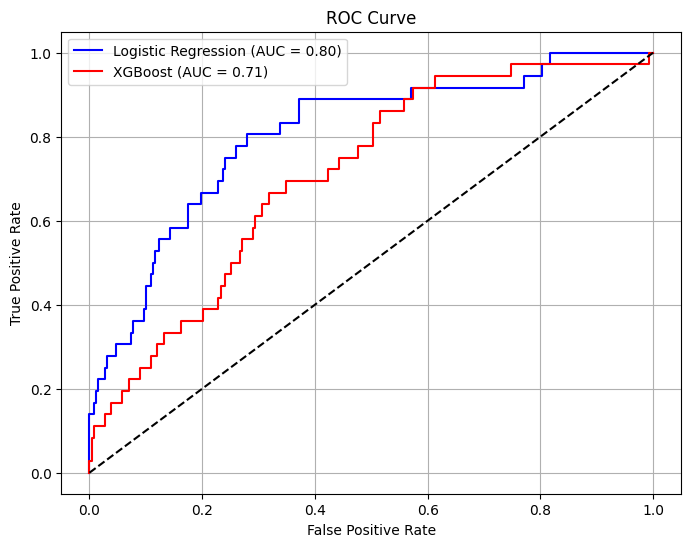

In [ ]:
y_proba_lr = model_lr.predict_proba(X_test_processed)[:, 1]
y_proba_xgb = model_xgb.predict_proba(X_test_processed)[:, 1]

auc_lr = roc_auc_score(y_test, y_proba_lr)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', color='red')
plt.plot([0, 1], [0, 1], color='black', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

Dari hasil modeling ini saya memilih Logistic Regression karena lebih baik dalam memperkirakan karyawan yang mungkin keluar dari perusahaan (attrition) dengan tingkat keakuratan yang lebih tinggi, terutama dalam menemukan karyawan yang sebenarnya akan keluar (recall). Meskipun secara keseluruhan akurasi sedikit lebih rendah dibandingkan dengan XGBoost, namun kemampuannya dalam menangkap karyawan yang mungkin keluar dianggap lebih penting.

Save preprocesing dan model untuk membuat aplikasi prediksi attrition menggunakan streamlit

In [ ]:
joblib.dump(preprocessor, 'preprocessor.pkl')
joblib.dump(model_lr, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']